In [1]:
import pandas as pd
import os
import subprocess

In [2]:
df=pd.read_csv('AI_Economy.csv')
df

,Date,Ticker,Sector,Industry,Role,Close,Volume,Daily_Turnover,Log_Returns,Volatility_20d,RSI_14,SMA_50,SMA_200
0,2020-10-15,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.9267,267224000,3.721551e+09,-0.0089,0.3765,67.3471,12.7260,8.9561
1,2020-10-16,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.7687,242392000,3.337423e+09,-0.0114,0.3677,62.2981,12.7755,8.9951
2,2020-10-19,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4559,298068000,4.010780e+09,-0.0230,0.3734,54.1464,12.8214,9.0330
3,2020-10-20,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.6032,229212000,3.118021e+09,0.0109,0.3737,51.8412,12.8709,9.0715
4,2020-10-21,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4828,219596000,2.960777e+09,-0.0089,0.3374,48.5798,12.9243,9.1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45920,2026-01-09,SILJ,Commodities,Silver,Electronics Contacts,30.5600,7112200,2.173488e+08,0.0350,0.4597,67.1999,25.1734,18.3297
45921,2026-01-12,SILJ,Commodities,Silver,Electronics Contacts,32.2100,9744900,3.138832e+08,0.0526,0.4547,69.1927,25.3755,18.4302
45922,2026-01-13,SILJ,Commodities,Silver,Electronics Contacts,32.1200,10253400,3.293392e+08,-0.0028,0.4464,65.3782,25.5674,18.5289
45923,2026-01-14,SILJ,Commodities,Silver,Electronics Contacts,32.2800,10286200,3.320385e+08,0.0050,0.4426,65.3883,25.7693,18.6303


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45925 entries, 0 to 45924
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            45925 non-null  object 
 1   Ticker          45925 non-null  object 
 2   Sector          45925 non-null  object 
 3   Industry        45925 non-null  object 
 4   Role            45925 non-null  object 
 5   Close           45925 non-null  float64
 6   Volume          45925 non-null  int64  
 7   Daily_Turnover  45925 non-null  float64
 8   Log_Returns     45925 non-null  float64
 9   Volatility_20d  45925 non-null  float64
 10  RSI_14          45925 non-null  float64
 11  SMA_50          45925 non-null  float64
 12  SMA_200         45925 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 4.6+ MB


In [4]:
df.describe(include='all')

,Date,Ticker,Sector,Industry,Role,Close,Volume,Daily_Turnover,Log_Returns,Volatility_20d,RSI_14,SMA_50,SMA_200
count,45925,45925,45925,45925,45925,45925.000000,4.592500e+04,4.592500e+04,45925.000000,45925.000000,45925.000000,45925.000000,45925.000000
unique,1319,37,9,30,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2026-01-15,NVDA,Software,Cloud,Manufacturing Equipment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,1319,12824,5276,2638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,148.336654,2.641222e+07,2.405534e+09,0.000969,0.400274,53.204854,145.155163,135.979357
std,NaN,NaN,NaN,NaN,NaN,176.296234,7.322164e+07,5.045797e+09,0.027929,0.191879,16.911511,171.516731,160.189511
min,NaN,NaN,NaN,NaN,NaN,2.225000,2.200000e+04,2.898987e+05,-0.457900,0.074900,0.000000,2.602500,2.590200
25%,NaN,NaN,NaN,NaN,NaN,34.084500,2.948600e+06,1.795543e+08,-0.012500,0.273600,40.845900,33.258200,30.520900
50%,NaN,NaN,NaN,NaN,NaN,88.572900,7.925200e+06,7.700078e+08,0.000900,0.359400,53.385900,86.839400,79.454800
75%,NaN,NaN,NaN,NaN,NaN,177.850100,2.083000e+07,1.962461e+09,0.014500,0.482000,65.694700,173.383600,164.152200


In [5]:
df.shape

(45925, 13)

In [6]:
df.isnull().sum()

Date              0
Ticker            0
Sector            0
Industry          0
Role              0
Close             0
Volume            0
Daily_Turnover    0
Log_Returns       0
Volatility_20d    0
RSI_14            0
SMA_50            0
SMA_200           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns= df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.columns

Index(['date', 'ticker', 'sector', 'industry', 'role', 'close', 'volume',
       'daily_turnover', 'log_returns', 'volatility_20d', 'rsi_14', 'sma_50',
       'sma_200'],
      dtype='object')

In [10]:
df['sec_turnover']=df.groupby('sector')['daily_turnover'].transform('sum')
df

,date,ticker,sector,industry,role,close,volume,daily_turnover,log_returns,volatility_20d,rsi_14,sma_50,sma_200,sec_turnover
0,2020-10-15,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.9267,267224000,3.721551e+09,-0.0089,0.3765,67.3471,12.7260,8.9561,4.947147e+13
1,2020-10-16,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.7687,242392000,3.337423e+09,-0.0114,0.3677,62.2981,12.7755,8.9951,4.947147e+13
2,2020-10-19,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4559,298068000,4.010780e+09,-0.0230,0.3734,54.1464,12.8214,9.0330,4.947147e+13
3,2020-10-20,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.6032,229212000,3.118021e+09,0.0109,0.3737,51.8412,12.8709,9.0715,4.947147e+13
4,2020-10-21,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4828,219596000,2.960777e+09,-0.0089,0.3374,48.5798,12.9243,9.1090,4.947147e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45920,2026-01-09,SILJ,Commodities,Silver,Electronics Contacts,30.5600,7112200,2.173488e+08,0.0350,0.4597,67.1999,25.1734,18.3297,2.388820e+11
45921,2026-01-12,SILJ,Commodities,Silver,Electronics Contacts,32.2100,9744900,3.138832e+08,0.0526,0.4547,69.1927,25.3755,18.4302,2.388820e+11
45922,2026-01-13,SILJ,Commodities,Silver,Electronics Contacts,32.1200,10253400,3.293392e+08,-0.0028,0.4464,65.3782,25.5674,18.5289,2.388820e+11
45923,2026-01-14,SILJ,Commodities,Silver,Electronics Contacts,32.2800,10286200,3.320385e+08,0.0050,0.4426,65.3883,25.7693,18.6303,2.388820e+11


In [11]:
df.describe()

,close,volume,daily_turnover,log_returns,volatility_20d,rsi_14,sma_50,sma_200,sec_turnover
count,45925.000000,4.592500e+04,4.592500e+04,45925.000000,45925.000000,45925.000000,45925.000000,45925.000000,4.592500e+04
mean,148.336654,2.641222e+07,2.405534e+09,0.000969,0.400274,53.204854,145.155163,135.979357,2.518408e+13
std,176.296234,7.322164e+07,5.045797e+09,0.027929,0.191879,16.911511,171.516731,160.189511,2.377448e+13
min,2.225000,2.200000e+04,2.898987e+05,-0.457900,0.074900,0.000000,2.602500,2.590200,2.388820e+11
25%,34.084500,2.948600e+06,1.795543e+08,-0.012500,0.273600,40.845900,33.258200,30.520900,1.815109e+12
50%,88.572900,7.925200e+06,7.700078e+08,0.000900,0.359400,53.385900,86.839400,79.454800,4.421013e+12
75%,177.850100,2.083000e+07,1.962461e+09,0.014500,0.482000,65.694700,173.383600,164.152200,4.947159e+13
max,1544.960000,1.543911e+09,9.992954e+10,0.307100,2.400000,100.000000,1238.242300,974.554400,4.947159e+13


In [12]:
corr_columns=df[['volume','rsi_14','sma_50','sma_200','close','daily_turnover','log_returns','volatility_20d']]
correlation = corr_columns.corr()
correlation


,volume,rsi_14,sma_50,sma_200,close,daily_turnover,log_returns,volatility_20d
volume,1.000000,0.017337,-0.119006,-0.123440,-0.117161,0.663957,0.015544,0.171450
rsi_14,0.017337,1.000000,-0.013602,-0.024364,0.045652,0.037066,0.240335,-0.074418
sma_50,-0.119006,-0.013602,1.000000,0.984233,0.992963,0.118476,-0.009947,-0.066635
sma_200,-0.123440,-0.024364,0.984233,1.000000,0.971361,0.105326,-0.011175,-0.059024
close,-0.117161,0.045652,0.992963,0.971361,1.000000,0.120613,0.009220,-0.077306
daily_turnover,0.663957,0.037066,0.118476,0.105326,0.120613,1.000000,0.016867,0.093044
log_returns,0.015544,0.240335,-0.009947,-0.011175,0.009220,0.016867,1.000000,0.002248
volatility_20d,0.171450,-0.074418,-0.066635,-0.059024,-0.077306,0.093044,0.002248,1.000000


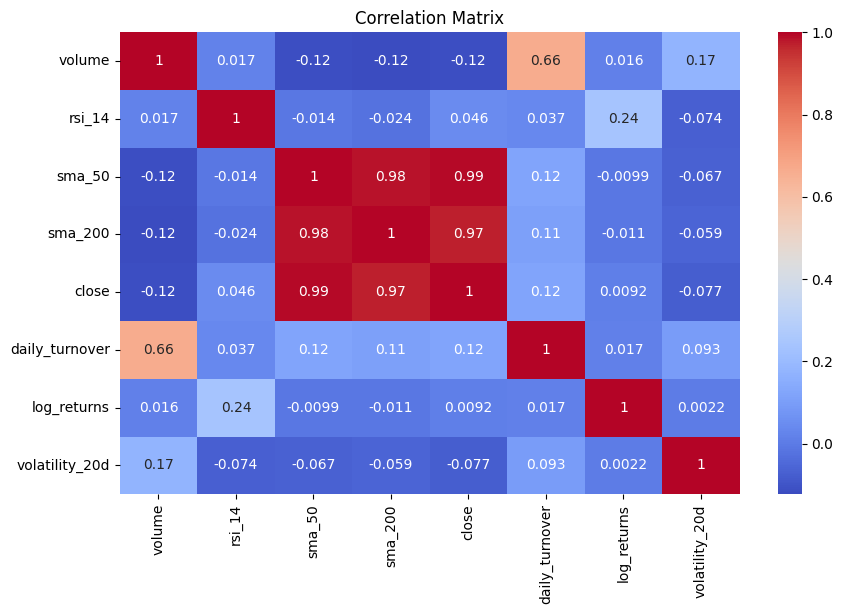

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
df['high_volume'] = df['volume'].apply(lambda x: x > 1_000_000)
df.head(5)

,date,ticker,sector,industry,role,close,volume,daily_turnover,log_returns,volatility_20d,rsi_14,sma_50,sma_200,sec_turnover,high_volume
0,2020-10-15,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.9267,267224000,3.721551e+09,-0.0089,0.3765,67.3471,12.7260,8.9561,4.947147e+13,True
1,2020-10-16,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.7687,242392000,3.337423e+09,-0.0114,0.3677,62.2981,12.7755,8.9951,4.947147e+13,True
2,2020-10-19,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4559,298068000,4.010780e+09,-0.0230,0.3734,54.1464,12.8214,9.0330,4.947147e+13,True
3,2020-10-20,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.6032,229212000,3.118021e+09,0.0109,0.3737,51.8412,12.8709,9.0715,4.947147e+13,True
4,2020-10-21,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4828,219596000,2.960777e+09,-0.0089,0.3374,48.5798,12.9243,9.1090,4.947147e+13,True


In [15]:
df['market_state'] = df['rsi_14'].apply(
    lambda x: 'Overbought' if x > 70 else 'Oversold' if x < 30 else 'Neutral'
)
df

,date,ticker,sector,industry,role,close,volume,daily_turnover,log_returns,volatility_20d,rsi_14,sma_50,sma_200,sec_turnover,high_volume,market_state
0,2020-10-15,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.9267,267224000,3.721551e+09,-0.0089,0.3765,67.3471,12.7260,8.9561,4.947147e+13,True,Neutral
1,2020-10-16,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.7687,242392000,3.337423e+09,-0.0114,0.3677,62.2981,12.7755,8.9951,4.947147e+13,True,Neutral
2,2020-10-19,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4559,298068000,4.010780e+09,-0.0230,0.3734,54.1464,12.8214,9.0330,4.947147e+13,True,Neutral
3,2020-10-20,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.6032,229212000,3.118021e+09,0.0109,0.3737,51.8412,12.8709,9.0715,4.947147e+13,True,Neutral
4,2020-10-21,NVDA,Semiconductors,GPU Designer,AI Training Hardware,13.4828,219596000,2.960777e+09,-0.0089,0.3374,48.5798,12.9243,9.1090,4.947147e+13,True,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45920,2026-01-09,SILJ,Commodities,Silver,Electronics Contacts,30.5600,7112200,2.173488e+08,0.0350,0.4597,67.1999,25.1734,18.3297,2.388820e+11,True,Neutral
45921,2026-01-12,SILJ,Commodities,Silver,Electronics Contacts,32.2100,9744900,3.138832e+08,0.0526,0.4547,69.1927,25.3755,18.4302,2.388820e+11,True,Neutral
45922,2026-01-13,SILJ,Commodities,Silver,Electronics Contacts,32.1200,10253400,3.293392e+08,-0.0028,0.4464,65.3782,25.5674,18.5289,2.388820e+11,True,Neutral
45923,2026-01-14,SILJ,Commodities,Silver,Electronics Contacts,32.2800,10286200,3.320385e+08,0.0050,0.4426,65.3883,25.7693,18.6303,2.388820e+11,True,Neutral


In [16]:
df.sort_values(by='log_returns', key=lambda x: abs(x))


,date,ticker,sector,industry,role,close,volume,daily_turnover,log_returns,volatility_20d,rsi_14,sma_50,sma_200,sec_turnover,high_volume,market_state
5368,2024-11-08,TSM,Semiconductors,Foundry,Manufacturing Monopoly,197.8966,13112100,2.594840e+09,0.0000,0.4687,49.2534,180.0174,155.7089,4.947147e+13,True,Neutral
36266,2023-04-20,CCJ,Energy,Uranium,Nuclear Fuel,25.4112,3742300,9.509626e+07,0.0000,0.2678,39.6969,26.2360,25.0475,4.734636e+11,True,Neutral
43051,2025-02-07,LIT,Commodities,Lithium,Battery Storage,40.8835,230700,9.431830e+06,0.0000,0.2174,39.5221,41.8751,41.1606,2.388820e+11,False,Neutral
21672,2021-07-06,MSFT,Software,Cloud,Azure / OpenAI,267.6561,31565600,8.448726e+09,0.0000,0.1312,83.2528,245.7395,223.8399,4.947159e+13,True,Overbought
21521,2020-11-25,MSFT,Software,Cloud,Azure / OpenAI,205.2168,21012900,4.312199e+09,0.0000,0.3038,37.1989,202.7437,184.8067,4.947159e+13,True,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27998,2025-09-10,ORCL,Software,Cloud,Sovereign AI Cloud,326.8971,131618100,4.302557e+10,0.3071,1.1709,84.2829,240.7492,182.9695,4.947159e+13,True,Overbought
35390,2025-01-27,VST,Utilities,Power Generation,Nuclear/Gas,136.3332,32356900,4.411321e+09,-0.3323,1.3555,38.3802,153.9023,108.0429,1.815109e+12,True,Neutral
19928,2025-01-27,VRT,Industrials,Electrical Equipment,Data Center Cooling,102.4540,47118800,4.827509e+09,-0.3550,1.4033,38.3308,127.4413,100.6931,9.346305e+11,True,Neutral
15913,2024-10-30,SMCI,Hardware,Server Systems,AI Server Racks,33.0700,236424500,7.818558e+09,-0.3956,1.5691,25.5296,45.9487,72.1745,2.967345e+12,True,Oversold


In [17]:
df.groupby(pd.cut(df['rsi_14'], [0,30,70,100]))['log_returns'].mean()


C:\Users\ankur\AppData\Local\Temp\ipykernel_22536\3011594599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['rsi_14'], [0,30,70,100]))['log_returns'].mean()


rsi_14
(0, 30]     -0.012080
(30, 70]     0.000252
(70, 100]    0.010659
Name: log_returns, dtype: float64

In [18]:
df['rsi_zone'] = pd.cut(
    df['rsi_14'],
    bins=[0, 30, 70, 100],
    labels=['Oversold', 'Neutral', 'Overbought']
)

df.groupby('rsi_zone')['log_returns'].mean()


C:\Users\ankur\AppData\Local\Temp\ipykernel_22536\3986761952.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('rsi_zone')['log_returns'].mean()


rsi_zone
Oversold     -0.012080
Neutral       0.000252
Overbought    0.010659
Name: log_returns, dtype: float64

In [19]:
df['trend'] = df['sma_50'] > df['sma_200']

df.groupby(['trend', 'rsi_zone'])['log_returns'].mean()


C:\Users\ankur\AppData\Local\Temp\ipykernel_22536\2128705526.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['trend', 'rsi_zone'])['log_returns'].mean()


trend  rsi_zone  
False  Oversold     -0.012738
       Neutral       0.000355
       Overbought    0.011083
True   Oversold     -0.011664
       Neutral       0.000205
       Overbought    0.010504
Name: log_returns, dtype: float64

In [20]:
ticker_volume = (
    df.groupby('ticker')
      .agg(
          sector=('sector', 'first'),
          industry=('industry', 'first'),
          total_volume=('volume', 'sum')
      )
      .sort_values('total_volume', ascending=False)
)

ticker_volume.head(10)


,sector,industry,total_volume
ticker,,,
NVDA,Semiconductors,GPU Designer,513394733830
AMD,Semiconductors,GPU Designer,79503463561
AMZN,Software,Cloud,77403913379
INTC,Semiconductors,IDM,71293611400
PLTR,Software,Analytics,65435387696
GOOGL,Software,Cloud,42653481035
SMCI,Hardware,Server Systems,41003155712
MSFT,Software,Cloud,33810859984
AVGO,Semiconductors,Networking Chips,32835885208


In [21]:
turnover_by_sector = (
    df.groupby('sector')['daily_turnover']
      .sum()
      .reset_index()
      .sort_values(by='daily_turnover')
)
turnover_by_sector

,sector,daily_turnover
0,Commodities,2.388820e+11
1,Energy,4.734636e+11
4,Networking,6.806316e+11
3,Industrials,9.346305e+11
8,Utilities,1.815109e+12
2,Hardware,2.967345e+12
5,Semi Equipment,4.421013e+12
6,Semiconductors,4.947147e+13
7,Software,4.947159e+13


In [22]:
'''df.groupby(df['date'].dt.month_name())['log_returns'].mean()
df.groupby(df['date'].dt.weekday)['log_returns'].mean()
df.groupby('date')['volume'].sum().plot()'''


"df.groupby(df['date'].dt.month_name())['log_returns'].mean()\ndf.groupby(df['date'].dt.weekday)['log_returns'].mean()\ndf.groupby('date')['volume'].sum().plot()"

In [23]:
df['date'] = pd.to_datetime(df['date'])


In [24]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()


In [25]:
df.groupby('month_name')['log_returns'].mean().sort_values(ascending=False)


month_name
May          0.003338
November     0.003172
January      0.001723
July         0.001715
June         0.001335
October      0.000881
March        0.000867
February     0.000364
December    -0.000037
September   -0.000255
August      -0.000559
April       -0.001086
Name: log_returns, dtype: float64

<Axes: title={'center': 'Average Price Over Time'}, xlabel='date'>

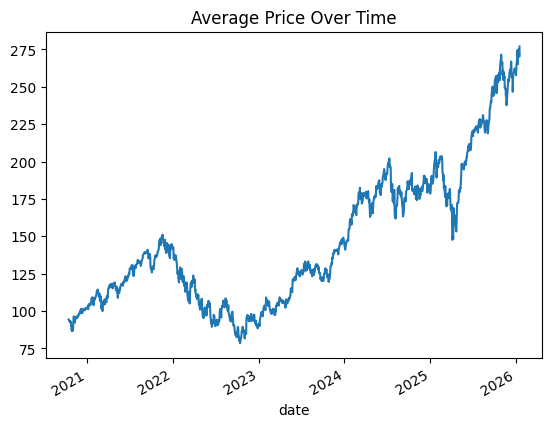

In [26]:
df.groupby('weekday')['volatility_20d'].mean()
df.groupby('date')['close'].mean().plot(title='Average Price Over Time')


<Axes: title={'center': 'Market Volume Over Time'}, xlabel='date'>

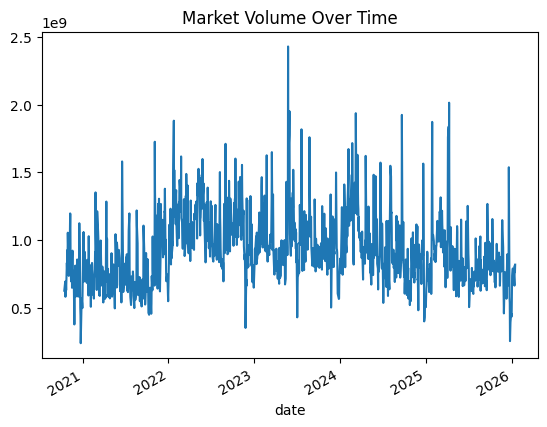

In [27]:
df.groupby('date')['volume'].sum().plot(title='Market Volume Over Time')


In [28]:
df['cum_returns'] = df.groupby('ticker')['log_returns'].cumsum()


In [29]:
df.groupby('date')['market_state'].value_counts(normalize=True)


date        market_state
2020-10-15  Neutral         0.656250
            Overbought      0.343750
2020-10-16  Neutral         0.812500
            Overbought      0.156250
            Oversold        0.031250
                              ...   
2026-01-14  Overbought      0.270270
            Oversold        0.162162
2026-01-15  Neutral         0.540541
            Overbought      0.297297
            Oversold        0.162162
Name: proportion, Length: 3285, dtype: float64

In [30]:
df.groupby('date')['trend'].mean()


date
2020-10-15    0.812500
2020-10-16    0.812500
2020-10-19    0.812500
2020-10-20    0.812500
2020-10-21    0.812500
                ...   
2026-01-09    0.756757
2026-01-12    0.756757
2026-01-13    0.756757
2026-01-14    0.756757
2026-01-15    0.756757
Name: trend, Length: 1319, dtype: float64

In [31]:
df.groupby('market_state')['log_returns'].apply(
    lambda x: x.mean()
)


market_state
Neutral       0.000252
Overbought    0.010659
Oversold     -0.012082
Name: log_returns, dtype: float64

In [32]:
df.groupby('rsi_zone')['log_returns'].apply(
    lambda x: (x > 0).mean()
)


C:\Users\ankur\AppData\Local\Temp\ipykernel_22536\1141853407.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('rsi_zone')['log_returns'].apply(


rsi_zone
Oversold      0.341487
Neutral       0.505380
Overbought    0.664045
Name: log_returns, dtype: float64

In [33]:
df.groupby('month_name')['log_returns'].apply(
    lambda x: x.mean()
).sort_values(ascending=False)


month_name
May          0.003338
November     0.003172
January      0.001723
July         0.001715
June         0.001335
October      0.000881
March        0.000867
February     0.000364
December    -0.000037
September   -0.000255
August      -0.000559
April       -0.001086
Name: log_returns, dtype: float64

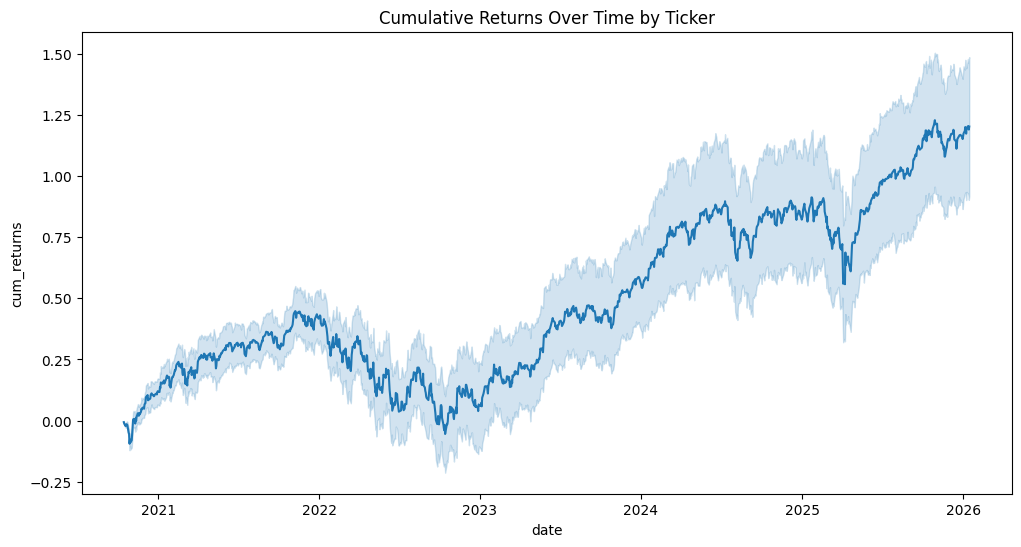

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='cum_returns')
plt.title('Cumulative Returns Over Time by Ticker')
plt.show()

In [35]:
df.columns

Index(['date', 'ticker', 'sector', 'industry', 'role', 'close', 'volume',
       'daily_turnover', 'log_returns', 'volatility_20d', 'rsi_14', 'sma_50',
       'sma_200', 'sec_turnover', 'high_volume', 'market_state', 'rsi_zone',
       'trend', 'year', 'month', 'month_name', 'day', 'weekday',
       'cum_returns'],
      dtype='object')

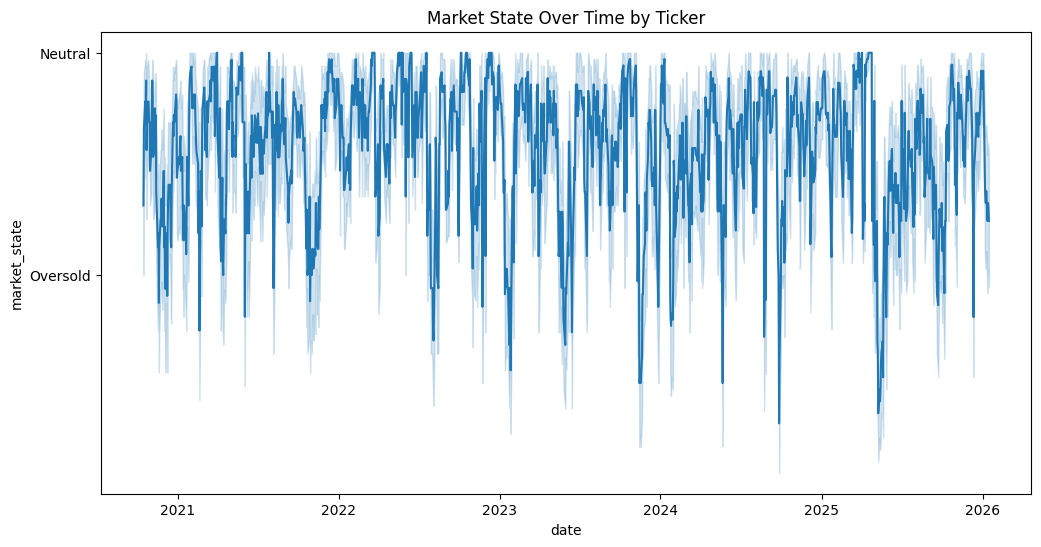

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='market_state')
plt.title('Market State Over Time by Ticker')
plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_22536\95000718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('rsi_zone')['log_returns'].mean().plot(kind='bar')


<Axes: xlabel='rsi_zone'>

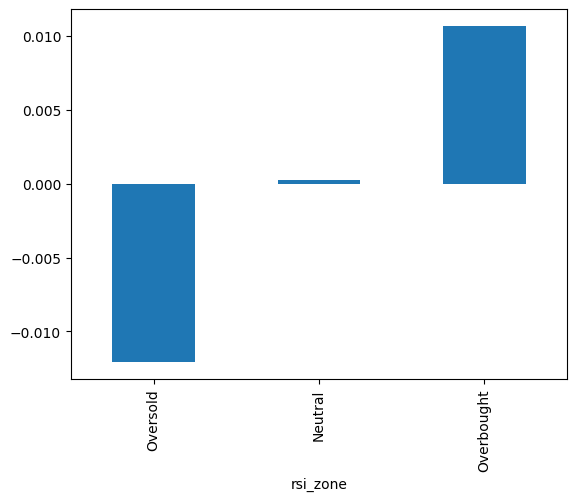

In [37]:
df.groupby('rsi_zone')['log_returns'].mean().plot(kind='bar')


<Axes: xlabel='sector'>

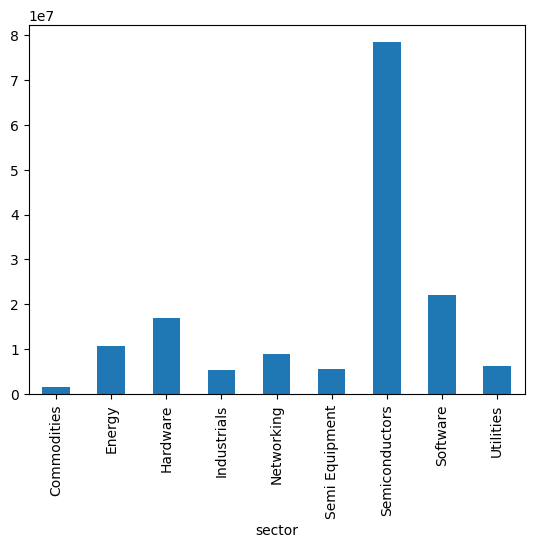

In [38]:
df.groupby('sector')['volume'].mean().plot(kind='bar')


<Axes: xlabel='date'>

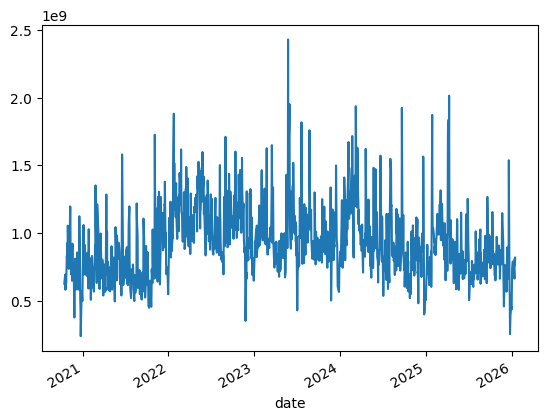

In [39]:
df.groupby('date')['volume'].sum().plot()


In [40]:
final_insights = (
    df.groupby(['trend', 'rsi_zone', 'market_state'])
      .agg(
          avg_return=('log_returns', 'mean'),
          volatility=('volatility_20d', 'mean'),
          observations=('log_returns', 'count')
      )
      .sort_values('avg_return', ascending=False)
)

final_insights


C:\Users\ankur\AppData\Local\Temp\ipykernel_22536\3285473305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['trend', 'rsi_zone', 'market_state'])


avg_return  volatility  observations
trend rsi_zone   market_state                                      
False Overbought Overbought      0.011083    0.411512          2144
True  Overbought Overbought      0.010504    0.375658          5866
False Neutral    Neutral         0.000355    0.433485         10698
True  Neutral    Neutral         0.000205    0.385731         23128
      Oversold   Oversold       -0.011664    0.403458          2504
False Oversold   Oversold       -0.012738    0.459287          1584
                 Neutral              NaN         NaN             0
                 Overbought           NaN         NaN             0
      Neutral    Overbought           NaN         NaN             0
                 Oversold             NaN         NaN             0
      Overbought Neutral              NaN         NaN             0
                 Oversold             NaN         NaN             0
True  Oversold   Neutral              NaN         NaN             0
                 Overbought           NaN         NaN             0
      Neutral    Overbought           NaN         NaN             0
                 Oversold             NaN         NaN             0
      Overbought Neutral              NaN         NaN             0
                 Oversold             NaN         NaN             0

In [41]:
final_df = df[[
    'date', 'ticker', 'sector', 'industry',
    'close', 'volume', 'daily_turnover',
    'log_returns', 'volatility_20d',
    'rsi_14', 'rsi_zone',
    'trend', 'market_state',
    'cum_returns'
]]

final_df.to_csv('final_economy_data.csv', index=False)


In [44]:
pbix_file_path =  r"Project4.pbix"

if os.path.exists(pbix_file_path):
    try:
        subprocess.run(["start", "Power BI", pbix_file_path], shell=True)
        print(f"Power BI file '{pbix_file_path}' opened successfully!")
    except Exception as e:
        print(f"Error launching Power BI: {e}")
else:
    print(f"Power BI file not found at {pbix_file_path}")

Power BI file 'Project4.pbix' opened successfully!
